In [31]:
import numpy as np
from dnautils import fasta_read, get_motif, seq_to_onehot, rev_comp, rev_comp_onehot
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline  


motif_path = 'motif_pwms/known2.motif'
header, w = get_motif(motif_path)
print(w)


c = 0 
def get_max_conv(path):
    global c
    max_arr = []
    for i, (header, seq) in enumerate(fasta_read(path)):
        onehot = seq_to_onehot(seq)
        w_rc = rev_comp_onehot(w)    
        conv = signal.convolve2d(in1=onehot, in2=np.fliplr(np.flipud(w)), mode='valid')
        conv_rc = signal.convolve2d(in1=onehot, in2=np.fliplr(np.flipud(w_rc)), mode='valid')
        conv_max = np.maximum(conv, conv_rc)
        max_arr.append(np.max(conv))
#         plt.plot(conv[0])
#         plt.show()
#         c+=1
#         if c > 10:
#             break
        
        
        
    return max_arr

pos_max = get_max_conv('single.motif.50offset.50K.pos.fasta')
neg_max = get_max_conv('single.motif.50offset.50K.neg.fasta')

[[ 0.09   0.133  0.034  0.012  0.052  0.123  0.003  0.001  0.79   0.084
   0.107  0.089  0.119  0.738  0.916  0.011]
 [ 0.564  0.217  0.004  0.035  0.172  0.062  0.905  0.874  0.076  0.05
   0.002  0.005  0.693  0.018  0.025  0.94 ]
 [ 0.152  0.437  0.951  0.028  0.018  0.693  0.005  0.002  0.05   0.085
   0.89   0.902  0.061  0.19   0.044  0.006]
 [ 0.194  0.213  0.011  0.925  0.758  0.122  0.087  0.123  0.084  0.781
   0.001  0.004  0.127  0.054  0.015  0.043]]


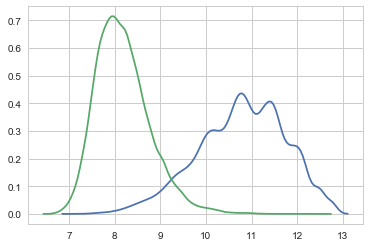

In [34]:
import seaborn as sns
%matplotlib inline  
sns.set_style('whitegrid')
bw = 0.5
sns.kdeplot(np.array(pos_max), )
sns.kdeplot(np.array(neg_max), )